## 0. Install and Import Dependencies

In [ ]:
%pip install -r requirements.txt

In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
 

In [2]:
plt.style.use('ggplot')

## 1. Load Data

In [62]:
df = pd.read_csv(os.path.join('data', 'customer_segmentation_data.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [4]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [5]:
df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


## 2. EDA

### 2.1 Univariate Analysis

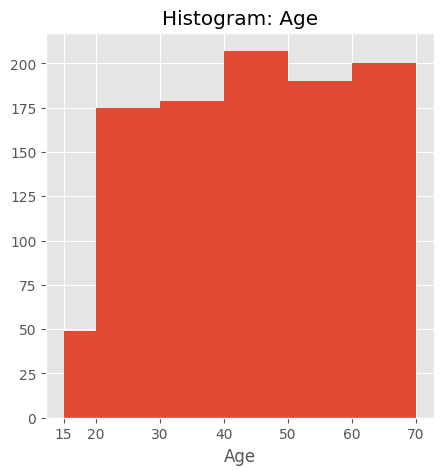

In [6]:
#Age
plt.figure(figsize=(5,5))
bins = [15, 20, 30, 40, 50, 60, 70]
plt.hist(df['age'], bins= bins)
plt.xlabel('Age')
plt.title('Histogram: Age')
plt.xticks(bins)

plt.show()

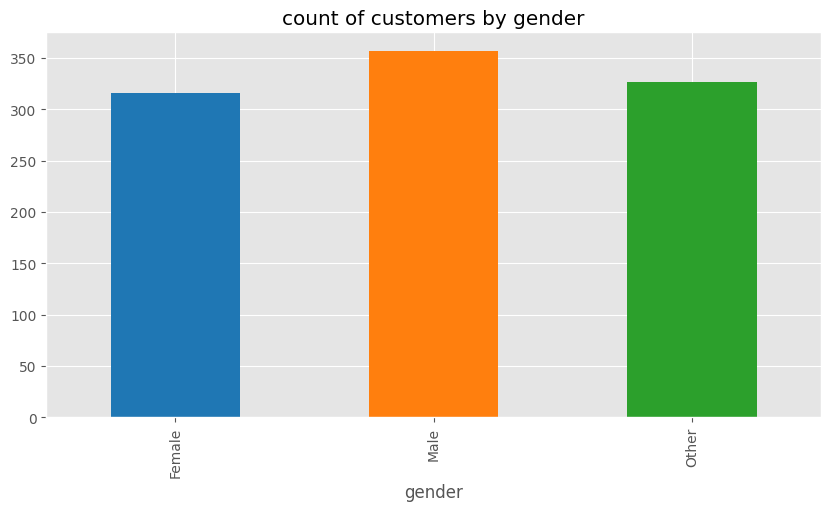

In [7]:
#gender
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df['gender'].value_counts())) % cmap.N)
len(df['gender'].value_counts())
df['gender'].value_counts().sort_index().plot(kind='bar', title='count of customers by gender',
                                              figsize=(10,5), color = colors)
plt.show()

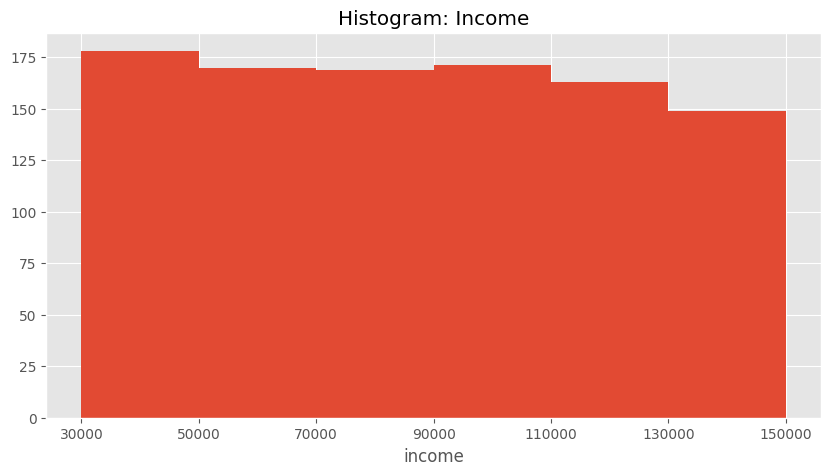

In [8]:
#income
plt.figure(figsize=(10,5))
bins = [30000, 50000, 70000, 90000, 110000, 130000, 150000]
plt.hist(df['income'], bins=bins)
plt.xlabel('income')
plt.title('Histogram: Income')
plt.xticks(bins)

plt.show()

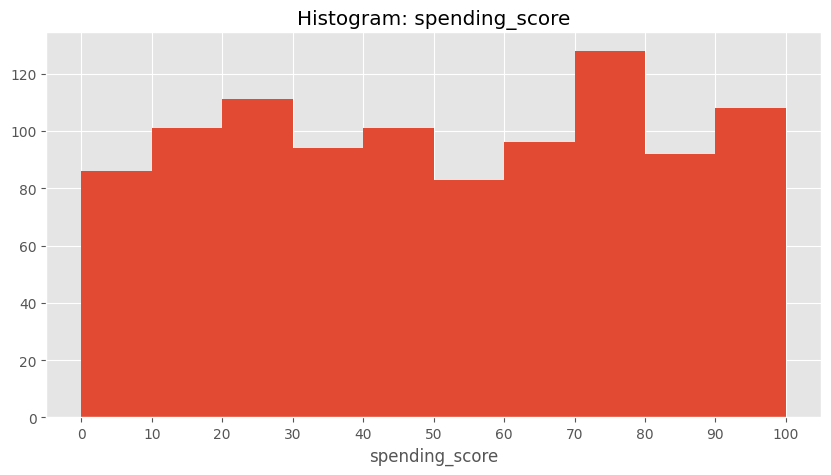

In [9]:
#spending_score
plt.figure(figsize=(10,5))
bins = list(range(0,110, 10))
plt.hist(df['spending_score'], bins=bins)
plt.xlabel('spending_score')
plt.title('Histogram: spending_score')
plt.xticks(bins)

plt.show()


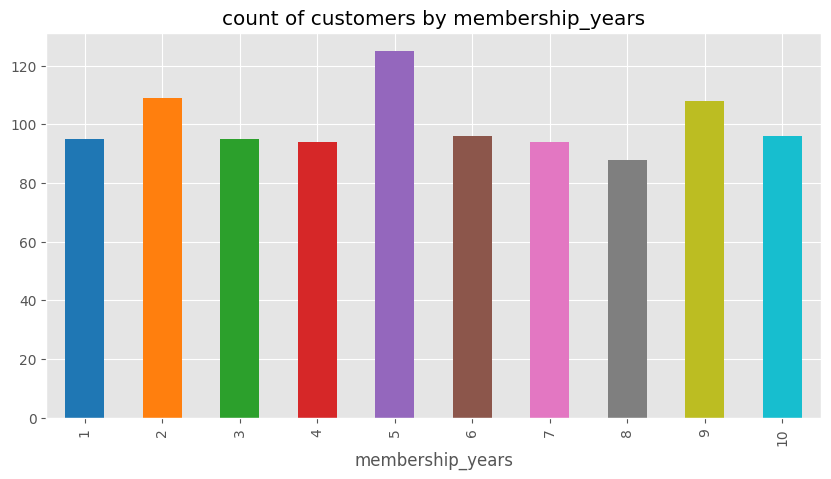

In [10]:
#membership_years
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df['membership_years'].value_counts())) % cmap.N)
df['membership_years'].value_counts().sort_index().plot(kind='bar',title='count of customers by membership_years',
                                                        figsize=(10,5), color = colors)
plt.show()

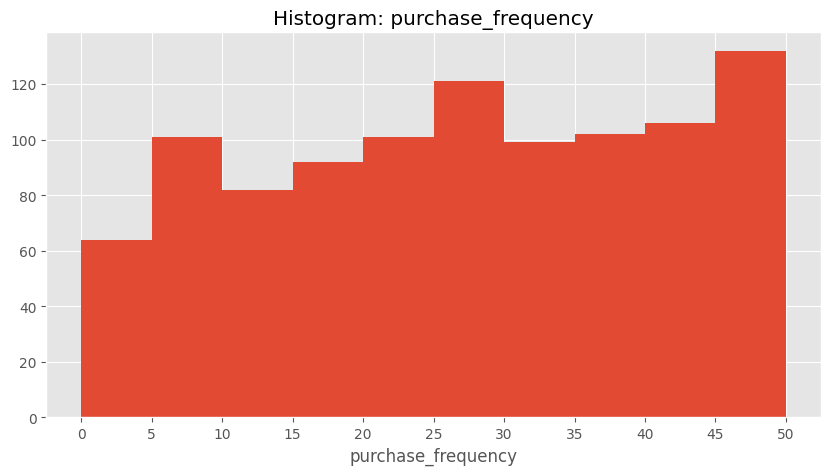

In [11]:
#purchase_frequency
plt.figure(figsize=(10,5))
bins = list(range(0,55, 5))
plt.hist(df['purchase_frequency'], bins=bins)
plt.xlabel('purchase_frequency')
plt.title('Histogram: purchase_frequency')
plt.xticks(bins)

plt.show()


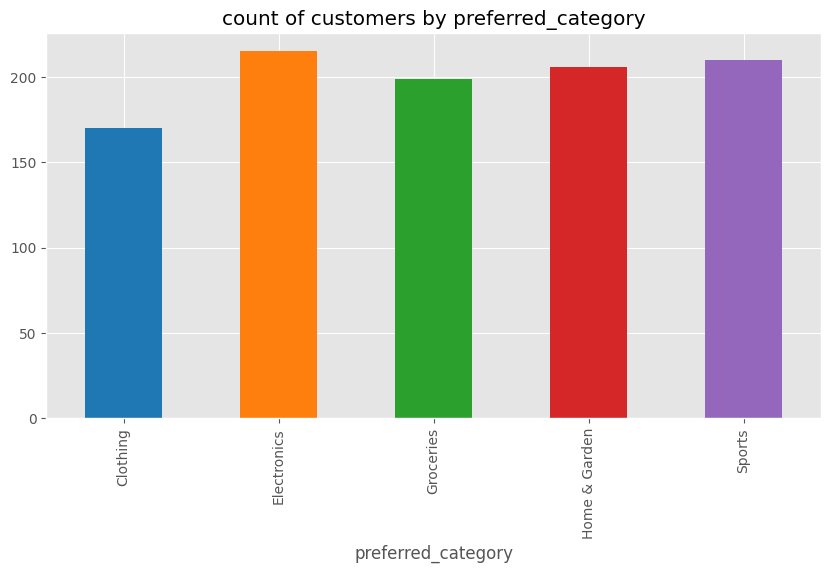

In [12]:
#preferred_category
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df['preferred_category'].value_counts())) % cmap.N)
df['preferred_category'].value_counts().sort_index().plot(kind='bar',title='count of customers by preferred_category',
                                                        figsize=(10,5), color = colors)
plt.show()

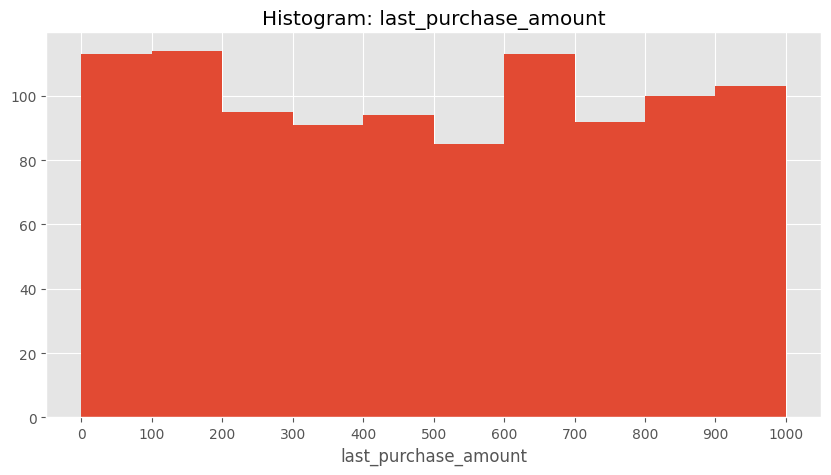

In [13]:
#last_purchase_amount
plt.figure(figsize=(10,5))
bins = list(range(0,1100, 100))
plt.hist(df['last_purchase_amount'], bins=bins)
plt.xlabel('last_purchase_amount')
plt.title('Histogram: last_purchase_amount')
plt.xticks(bins)

plt.show()

### 2.2. Bivariate Analysis

<Figure size 1000x500 with 0 Axes>

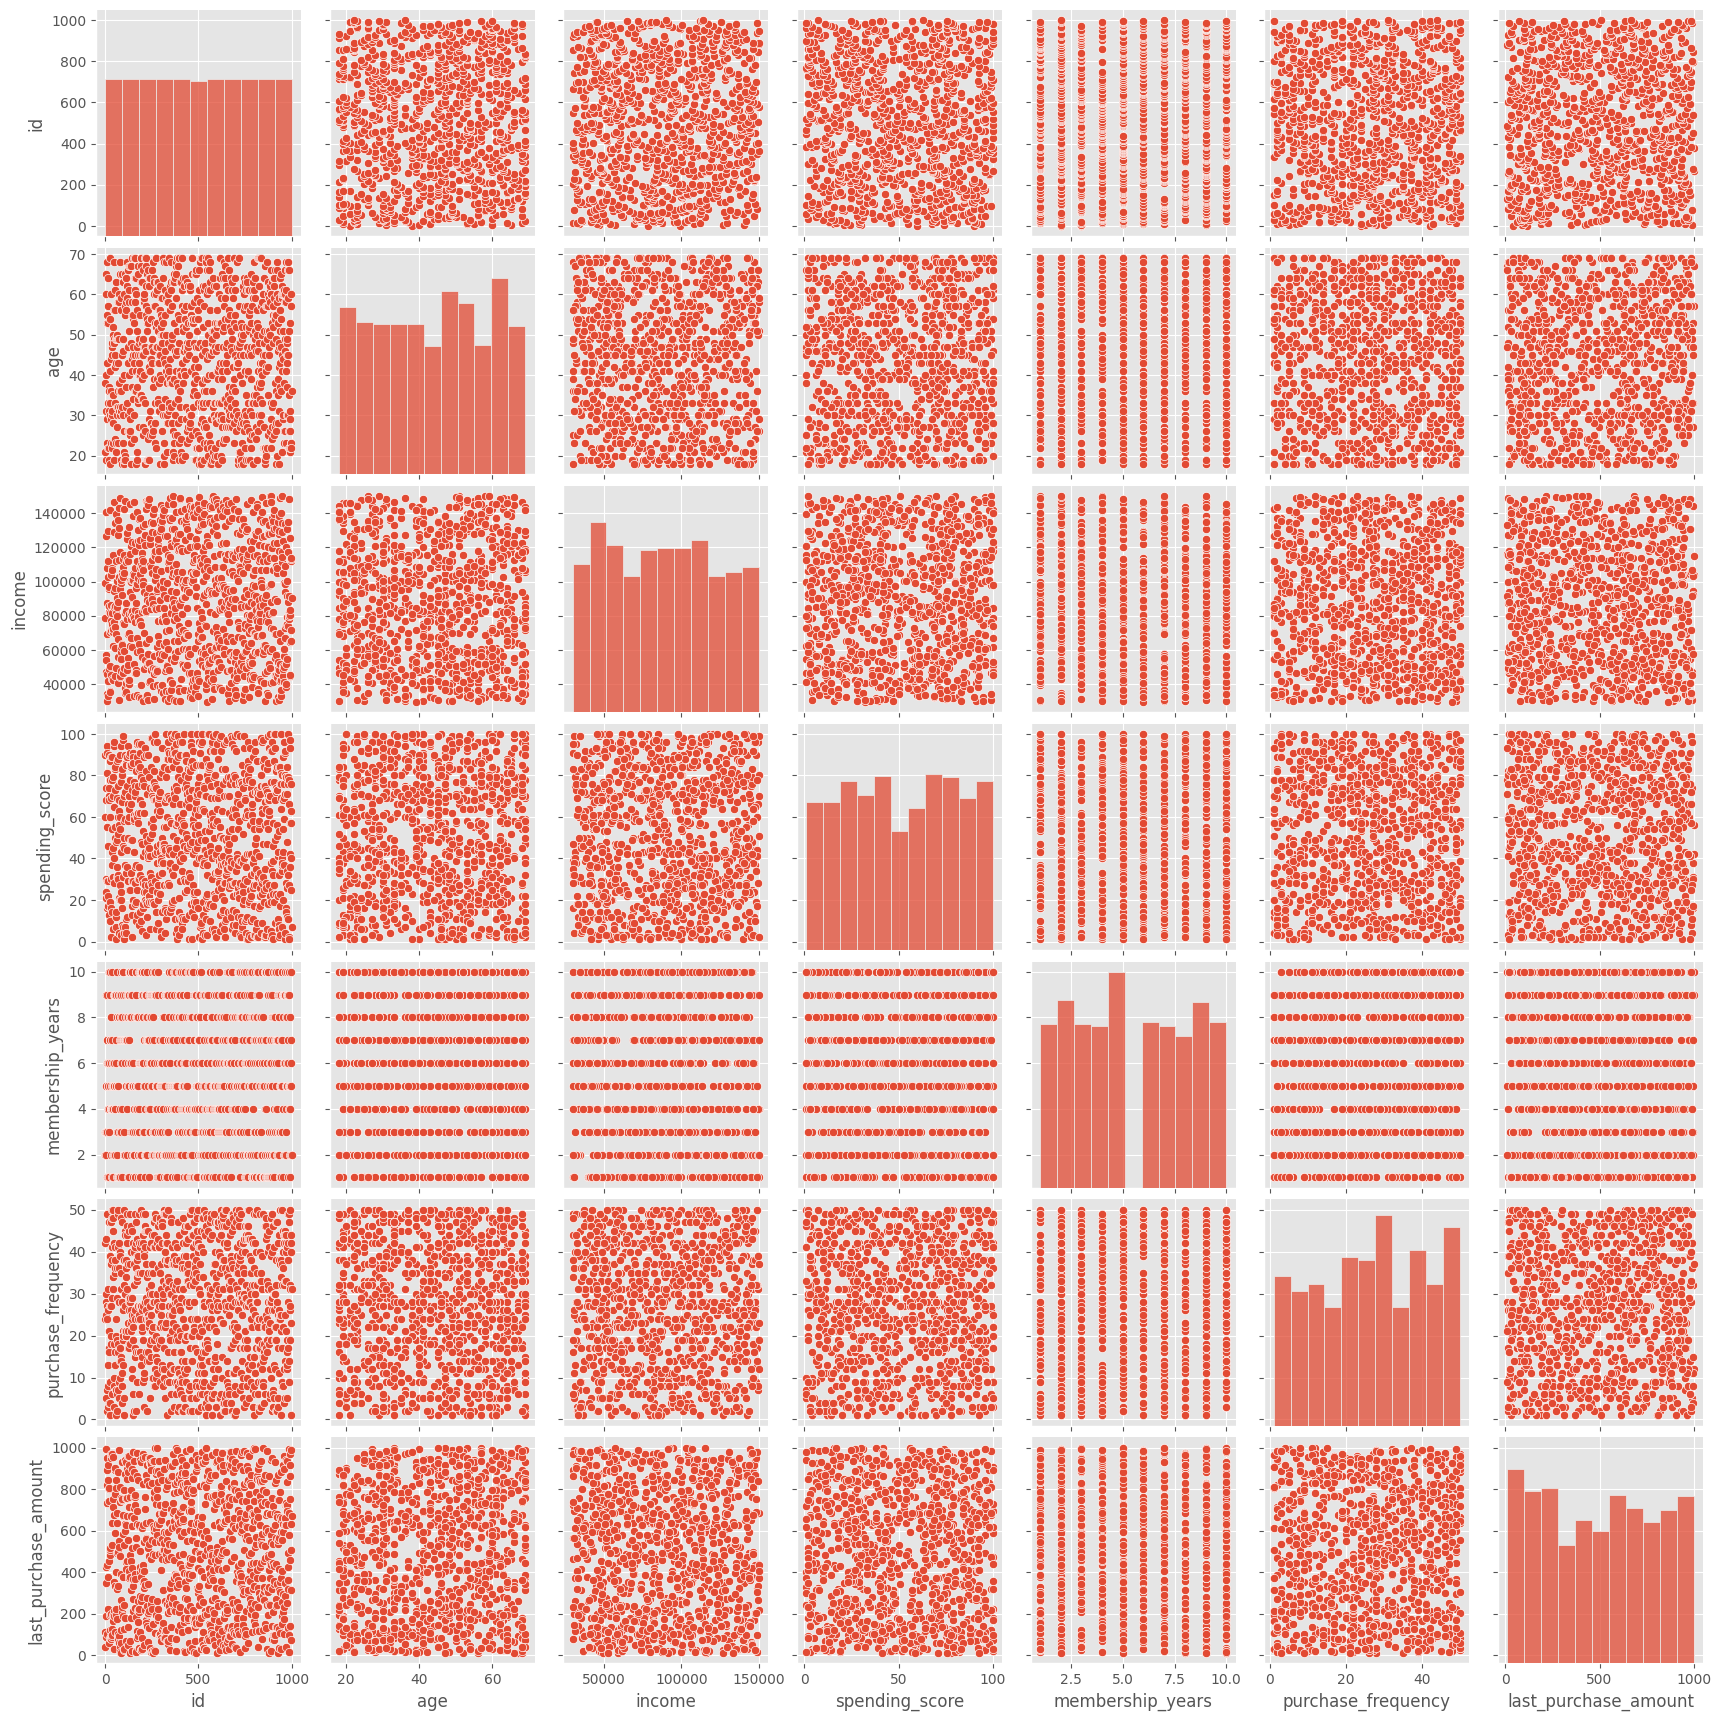

In [14]:
plt.figure(figsize=(10,5))
sns.pairplot(df)

plt.show()

From pairplots we can see that the values are scattered uniformly on the area of the plot. This randomness suggest 'independence' across variables.

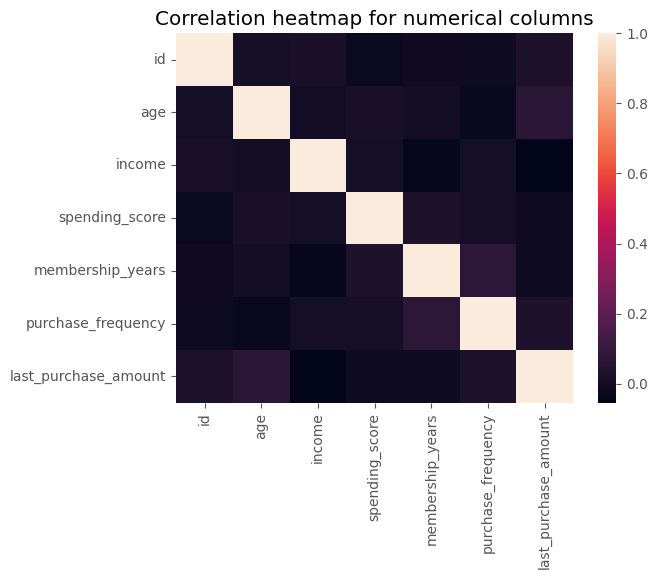

In [15]:
#Correlation analysis:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr)
plt.title('Correlation heatmap for numerical columns')
plt.show()

## 3. Data Preprocessing

In [63]:
df.drop_duplicates(inplace=True)

#### Steps
1. Split data into train and test
2. Feature Scaling (improves model performance, convergence, and prevents bias from features with larger values.)

In [64]:
df.drop(columns=['id'], inplace=True)

In [49]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,38,Female,99342,90,3,24,Groceries,113.53
1,21,Female,78852,60,2,42,Sports,41.93
2,60,Female,126573,30,2,28,Clothing,424.36
3,40,Other,47099,74,9,5,Home & Garden,991.93
4,65,Female,140621,21,3,25,Electronics,347.08


In [ ]:
#Split data train and test
#train, test = train_test_split(df, test_size=0.2, random_state=42)

In [65]:
#column transformer implementation
numerical_cols = list(df.select_dtypes('number').columns)
categorical_cols = list(df.select_dtypes('object').columns)

column_transform = ColumnTransformer(transformers=[
                ('numeric_transform', MinMaxScaler(), numerical_cols),
                ('categoric_transform', OneHotEncoder(sparse_output=False,), categorical_cols)
                ], verbose_feature_names_out=False)
column_transform.set_output(transform='pandas')
df_scaled = column_transform.fit_transform(df)

df_scaled.head()


,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,preferred_category_Clothing,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,0.392157,0.577966,0.898990,0.222222,0.469388,0.104241,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.058824,0.407172,0.595960,0.111111,0.836735,0.031870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.823529,0.804950,0.292929,0.111111,0.551020,0.418420,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.431373,0.142495,0.737374,0.888889,0.081633,0.992106,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.921569,0.922047,0.202020,0.222222,0.489796,0.340308,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 4. Model Implementation

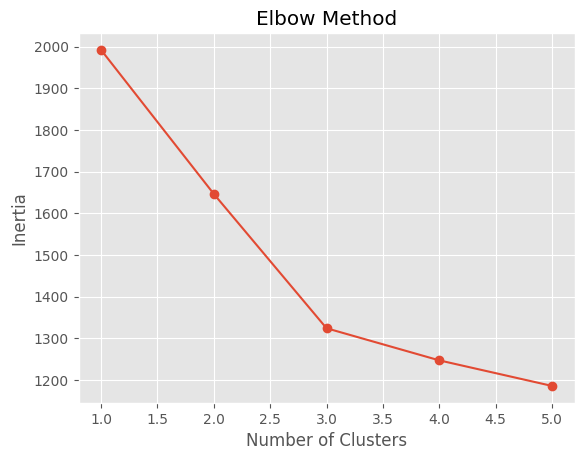

In [66]:
#Determine optimal number of clusters, k using Elbow Method :
# To find the best k, The Elbow Method helps identify the k 
# at which adding more clusters does not significantly reduce inertia.

inertia = []
cluster_range = range(1, 6)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

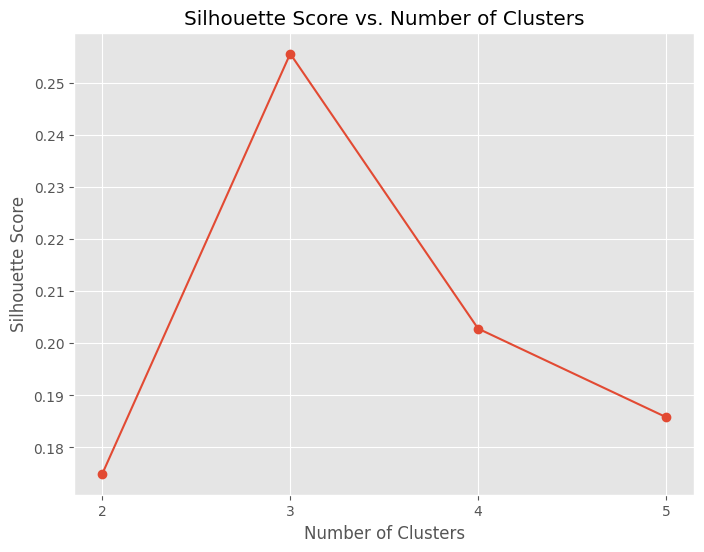

In [67]:
# # Determine optimal number of clusters, k using Silhouette Score:
# To find the best k, calculate the Silhouette Score for a range of cluster numbers and 
# choose k with the highest score.

silhouette_scores = []

# Range of clusters to try
cluster_range = range(2, 6)

# Calculate Silhouette Scores for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xticks(cluster_range)
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [68]:
# Apply K-Means with optimal clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df_scaled['clusters'] = clusters



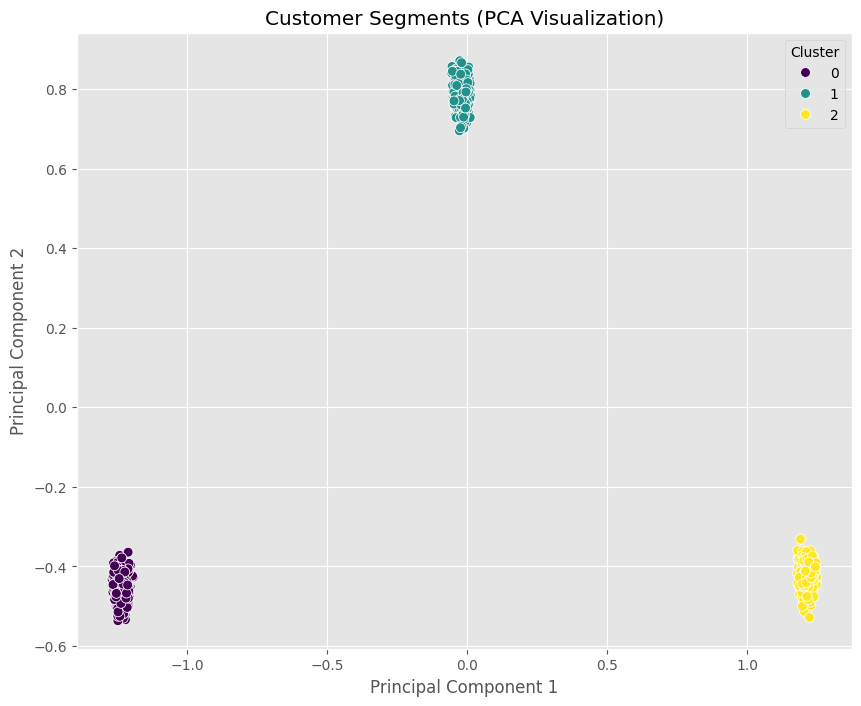

In [69]:
# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df_scaled)

# Create a DataFrame for visualization
reduced_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = clusters  # Add cluster labels

# Visualize the clusters in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster', palette='viridis', data=reduced_df, s=50
)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [70]:
df['clusters'] = clusters
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,clusters
0,38,Female,99342,90,3,24,Groceries,113.53,0
1,21,Female,78852,60,2,42,Sports,41.93,0
2,60,Female,126573,30,2,28,Clothing,424.36,0
3,40,Other,47099,74,9,5,Home & Garden,991.93,2
4,65,Female,140621,21,3,25,Electronics,347.08,0


In [71]:
cluster_0 = df[df['clusters']==0]
cluster_1 = df[df['clusters']==1]
cluster_2 = df[df['clusters']==2]

In [72]:
cluster_profile = df[list(df.select_dtypes('number'))].groupby('clusters').mean()
cluster_profile

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
clusters,,,,,,
0,43.876582,88018.104430,51.696203,5.316456,25.424051,458.018892
1,42.434174,88907.997199,48.778711,5.565826,28.302521,496.090112
2,45.165138,88522.703364,51.788991,5.510703,25.865443,521.438930


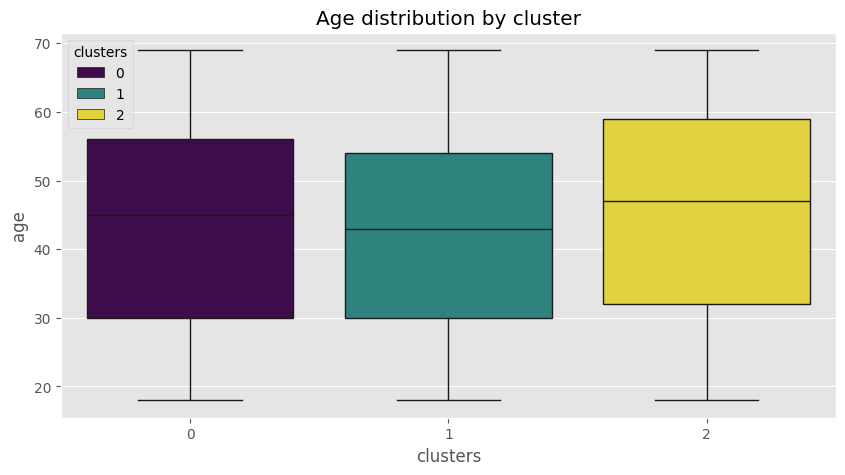

In [85]:
#age
plt.figure(figsize=(10,5))
sns.boxplot(x= 'clusters', y='age', hue='clusters', data=df, palette='viridis')
plt.title('Age distribution by cluster')
plt.show()


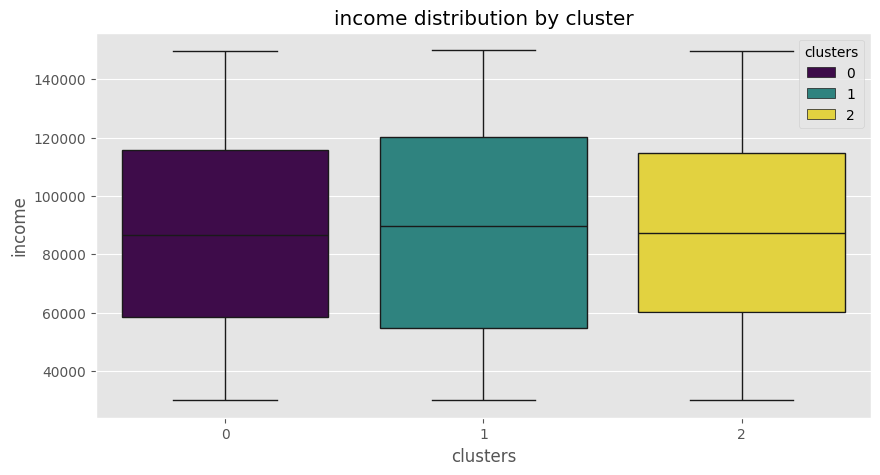

In [98]:
#income
plt.figure(figsize=(10,5))
sns.boxplot(x= 'clusters', y='income', hue='clusters', data=df, palette='viridis')
plt.title('income distribution by cluster')
plt.show()

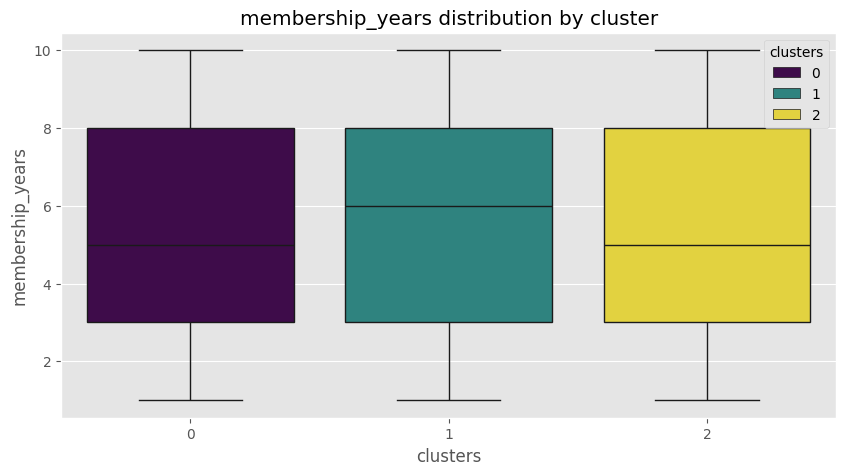

In [100]:
#membership_years
plt.figure(figsize=(10,5))
sns.boxplot(x= 'clusters', y='membership_years', hue='clusters', data=df, palette='viridis')
plt.title('membership_years distribution by cluster')
plt.show()

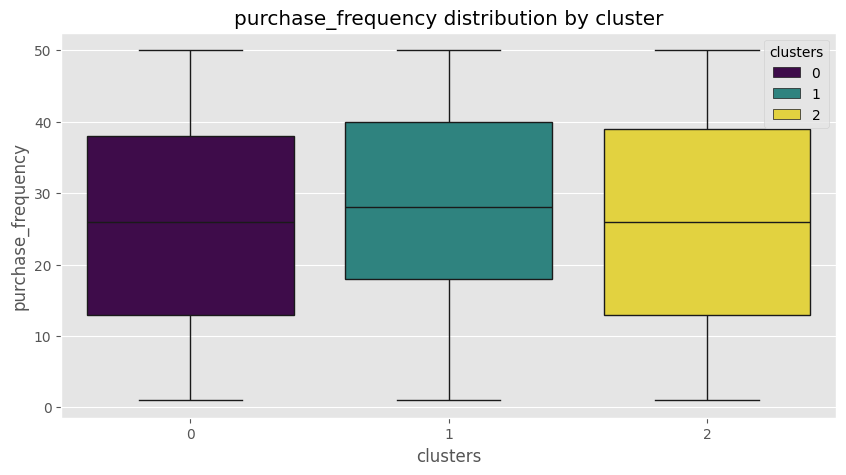

In [101]:
#purchase_frequency
plt.figure(figsize=(10,5))
sns.boxplot(x= 'clusters', y='purchase_frequency', hue='clusters', data=df, palette='viridis')
plt.title('purchase_frequency distribution by cluster')
plt.show()

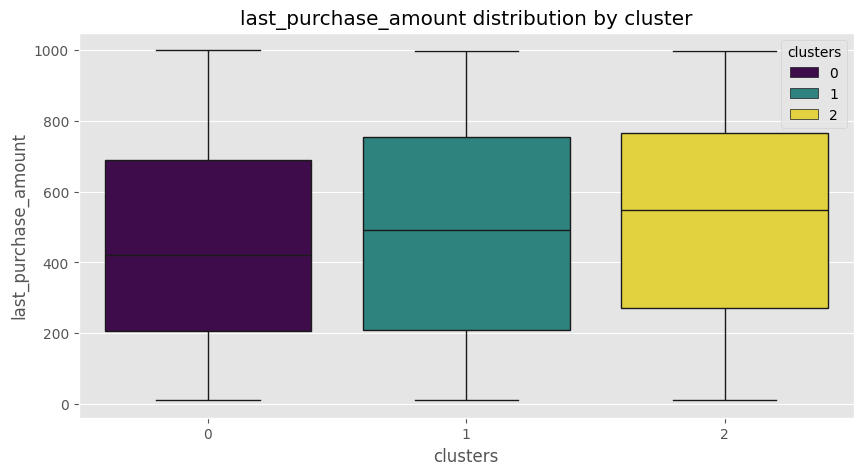

In [102]:
#last_purchase_amount
plt.figure(figsize=(10,5))
sns.boxplot(x= 'clusters', y='last_purchase_amount', hue='clusters', data=df, palette='viridis')
plt.title('last_purchase_amount distribution by cluster')
plt.show()

In [117]:
cluster_0['preferred_category'].value_counts(normalize=True)*100

preferred_category
Home & Garden    21.518987
Groceries        20.886076
Electronics      20.569620
Sports           19.303797
Clothing         17.721519
Name: proportion, dtype: float64

In [120]:
cluster_0['gender'].value_counts(normalize=True)

gender
Female    1.0
Name: proportion, dtype: float64

In [118]:
cluster_1['preferred_category'].value_counts(normalize=True)*100

preferred_category
Sports           21.568627
Home & Garden    21.568627
Electronics      21.288515
Groceries        19.887955
Clothing         15.686275
Name: proportion, dtype: float64

In [121]:
cluster_1['gender'].value_counts(normalize=True)

gender
Male    1.0
Name: proportion, dtype: float64

In [119]:
cluster_2['preferred_category'].value_counts(normalize=True)*100

preferred_category
Electronics      22.629969
Sports           22.018349
Groceries        18.960245
Home & Garden    18.654434
Clothing         17.737003
Name: proportion, dtype: float64

In [122]:
cluster_2['gender'].value_counts(normalize=True)

gender
Other    1.0
Name: proportion, dtype: float64

In [124]:
cluster_0.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,clusters
count,316.000000,316.00000,316.000000,316.000000,316.000000,316.000000,316.0
mean,43.876582,88018.10443,51.696203,5.316456,25.424051,458.018892,0.0
std,15.024233,32930.66336,29.276397,2.839827,14.133061,291.564846,0.0
min,18.000000,30074.00000,1.000000,1.000000,1.000000,11.010000,0.0
25%,30.000000,58665.00000,26.000000,3.000000,13.000000,205.252500,0.0
50%,45.000000,86801.50000,51.000000,5.000000,26.000000,420.555000,0.0
75%,56.000000,115610.25000,76.250000,8.000000,38.000000,690.682500,0.0
max,69.000000,149744.00000,100.000000,10.000000,50.000000,999.740000,0.0


In [125]:
cluster_1.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,clusters
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0
mean,42.434174,88907.997199,48.778711,5.565826,28.302521,496.090112,1.0
std,14.700923,36292.373050,29.016535,2.835223,13.851878,305.276610,0.0
min,18.000000,30004.000000,1.000000,1.000000,1.000000,12.360000,1.0
25%,30.000000,54918.000000,24.000000,3.000000,18.000000,208.790000,1.0
50%,43.000000,89688.000000,47.000000,6.000000,28.000000,491.640000,1.0
75%,54.000000,120294.000000,73.000000,8.000000,40.000000,755.670000,1.0
max,69.000000,149973.000000,100.000000,10.000000,50.000000,997.150000,1.0


In [126]:
cluster_2.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,clusters
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.0
mean,45.165138,88522.703364,51.788991,5.510703,25.865443,521.438930,2.0
std,15.341019,33228.407601,28.555104,2.895794,14.632940,286.548628,0.0
min,18.000000,30058.000000,1.000000,1.000000,1.000000,10.400000,2.0
25%,32.000000,60328.000000,28.000000,3.000000,13.000000,272.430000,2.0
50%,47.000000,87418.000000,54.000000,5.000000,26.000000,547.850000,2.0
75%,59.000000,114818.000000,75.000000,8.000000,39.000000,766.720000,2.0
max,69.000000,149741.000000,100.000000,10.000000,50.000000,997.240000,2.0


## 7. Model Save